In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset1 = pd.read_csv('test_1.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>=50.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>=50.0)]
print(data_neg.shape)
print(data_pos.shape)

(12703, 22)
(4564, 22)


In [2]:
dataset = pd.read_csv('test.csv',delimiter = ',')
dataset1 = pd.read_csv('test_1.csv',delimiter = ',') # this one does not take care the CRAN before GH date
dataset = dataset.loc[dataset['proj_span'] >= 50.0]
dataset1 = dataset1.loc[dataset1['proj_span'] >= 50.0]

In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(17267, 22)

In [4]:
X_1 = (dataset1.drop('class', axis=1)).drop('id', axis=1)
y_1 = dataset1['class']
dataset1.shape

(17267, 22)

In [5]:

dataset1.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Fork,num_Gollum,...,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,...,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000
mean,0.161972,0.264319,6.575028,6.501071,0.156367,0.129148,1.038049,0.240111,3.513465,0.529739,...,1.623849,0.084960,0.024208,7.268257,1.543059,17.401807,0.077489,0.011583,1.251231,285.370012
std,0.441523,0.440983,301.426692,301.428121,0.155001,1.487038,3.072750,2.251304,292.981824,7.823614,...,11.353639,0.559573,0.196087,49.305409,28.532156,44.880187,0.809002,0.122638,9.863314,282.876253
min,0.001468,0.000000,1.000000,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,0.026087,0.000000,1.000000,1.000000,0.053151,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,97.000000
50%,0.059880,0.000000,2.000000,2.000000,0.101370,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,185.000000
75%,0.154930,1.000000,3.000000,3.000000,0.191233,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,16.000000,0.000000,0.000000,0.000000,349.000000
max,29.613683,1.000000,39519.000000,39519.000000,0.986301,89.000000,117.000000,114.000000,38469.000000,649.000000,...,401.000000,34.000000,13.000000,4139.000000,2625.000000,1494.000000,54.000000,3.000000,607.000000,1800.000000


In [6]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=20190101)

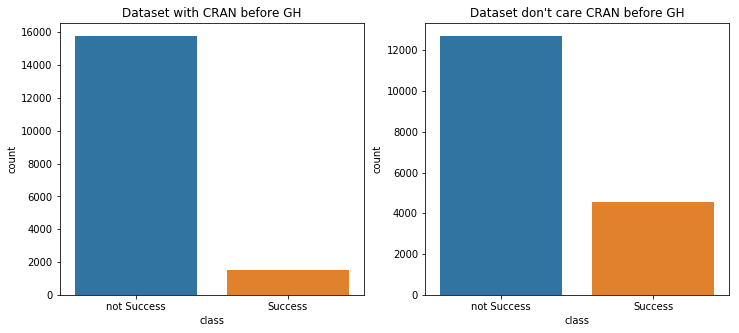

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.91155
Precision on train: 0.34783
Recall on train: 0.03868

Classification accuracy of the LogisticRegression classifier on test set: 0.90793
Precision on test: 0.36508
Recall on test: 0.05000


array([[4681,   40],
       [ 437,   23]])

In [9]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-3.62911899e-01 -2.20986839e-01  1.00412238e-01  5.06838338e-07
   1.42385575e-01  9.65309232e-02  7.52194299e-02  9.51297299e-02
   1.22435631e-02  2.14645995e-03  9.53234856e-03 -9.84263266e-02
  -4.52579316e-02  6.26933170e-03 -6.78721370e-03 -3.75679599e-03
   2.05888971e-01 -4.88126579e-03  1.43931800e-01  9.24979966e-04]]
[-2.43527536]


In [10]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [12]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.76171
Precision on train: 0.67404
Recall on train: 0.18213

Classification accuracy of the LogisticRegression classifier on test set: 0.75526
Precision on test: 0.65517
Recall on test: 0.17834


In [13]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-2.96538952e-01 -9.47407009e-02  1.62899198e-01  6.70733721e-07
   1.03728373e-02  3.36963598e-01 -1.67649038e-01 -2.45076329e-01
  -1.76031733e-02  1.49322107e-02  8.26863954e-03 -1.17713150e-01
  -7.93387972e-02 -1.79052975e-03  8.82665276e-04 -1.54745635e-02
  -5.48425743e-04 -1.84384374e-02 -2.99514535e-02  1.22408904e-03]]
[-1.45815513]


In [14]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [15]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

ss1 = StandardScaler()
ss1.fit(X_tr_1)
X_tr_1 = ss.transform(X_tr_1)
X_test_1 = ss.transform(X_test_1)

In [16]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.91469
Precision on train: 0.52055
Recall on train: 0.03675

Classification accuracy of the LogisticRegression classifier on test set: 0.90909
Precision on test: 0.34286
Recall on test: 0.02609


In [17]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[ 0.11573549  0.00261494  0.07814995  0.20344746  0.0600677   0.40893433
  -0.2954268  -1.70065353 -0.07686108 -0.11134191  0.2114973  -0.02920636
  -0.05133449  0.08888731 -0.03342336 -0.08913198 -0.04338815  0.02139931
   0.05533942  0.20344746]]
[-2.5161522]


In [18]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [19]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.76485
Precision on train: 0.71089
Recall on train: 0.17867

Classification accuracy of the LogisticRegression classifier on test set: 0.76298
Precision on test: 0.71625
Recall on test: 0.18773


In [20]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-8.23086065e-01 -9.83476879e-01 -7.81302545e-01  1.26731695e-01
  -1.63924885e-02  1.11327238e+00 -2.78721543e-01 -2.99189880e+00
  -1.67990109e-01  1.78272003e-01  3.51699965e-01 -1.67751928e-01
  -2.72089311e-01  2.21301657e-01  9.40039735e-02 -4.47637388e-01
  -2.32324605e-01 -7.89261209e-02  1.40387874e-03  1.26731695e-01]]
[-1.21457353]


In [21]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.996938606652325
Precision on train: 0.99701
Recall on train: 0.96712

Accuracy score on the test dataset: 0.91237
Precision on test: 0.52459
Recall on test: 0.13913


In [23]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [24]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. normalized_proj_span
3. proj_span
4. num_Push
5. num_PullRequest
6. num_Create
7. first_quater_teamsize
8. final_teamsize
9. num_PullRequestReviewComment
10. num_Fork


In [25]:
# dataset_1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr_1, y_tr_1)
y_pred = rf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
accuracy_score_train = rf.score(X_tr_1, y_tr_1)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
accuracy_score_test = rf.score(X_test_1, y_test_1)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9918087042859507
Precision on train: 0.98827
Recall on train: 0.98050

Accuracy score on the test dataset: 0.81857
Precision on test: 0.73545
Recall on test: 0.50181


In [26]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [27]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. normalized_proj_span
3. num_Create
4. proj_span
5. num_Push
6. num_PullRequest
7. first_quater_teamsize
8. final_teamsize
9. num_Fork
10. num_Watch


In [28]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [29]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.91991
Radial Basis Function SVC classification accuracy on test set: 0.91141


In [30]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.97143
Recall on train: 0.06576
Precision on test: 0.66667
Recall on test: 0.00435


In [31]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_1, y_tr_1)
ca = svc_rbf.score(X_tr_1, y_tr_1)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test_1, y_test_1)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.78893
Radial Basis Function SVC classification accuracy on test set: 0.77591


In [32]:
y_pred = svc_rbf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Precision on train: 0.85845
Recall on train: 0.23655
Precision on test: 0.80601
Recall on test: 0.21300
